<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%82%AC%EA%B8%B0_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

신용 카드 사기 탐지 데이터를 데이터프레임으로 로드합니다.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
card_df.shape

(284807, 31)

이 데이터는 총 28만여개의 행과 31개의 열을 가지고 있습니다.

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

데이터는 사기여부를 나타내는 Class 열을 제외하고는 전부 실수형 타입입니다.

In [ ]:
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

결측값은 존재하지 않습니다.

In [ ]:
card_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

이를 비율로 계산해봅시다.

In [ ]:
print(f'정상 거래 비율 = {round(card_df["Class"].value_counts()[0]/len(card_df) * 100,3)}%')
print(f'사기 탐지 = {round(card_df["Class"].value_counts()[1]/len(card_df) * 100,3)}%')

정상 거래 비율 = 99.827%
사기 탐지 = 0.173%


정상 거래 비율이 99.827%로 데이터의 레이블이 굉장히 불균형합니다. 사실 신용카드의 거래 대부분이 정상이고, 사기 건수는 일반적이지 않은 경우이기 때문입니다. 전체 데이터 28만여개 중 신용카드 사기 건수의 데이터가 500건도 안 되기 때문에 이런 경우는 사기 거래를 탐지하는 시스템을 만들기 쉽지 않습니다. 클래스가 1인 경우(사기)와 0인 경우(정상 거래)의 통계치를 다음과 같이 확인할 수 있습니다.

In [ ]:
card_df[card_df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
card_df[card_df['Class']==0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689399,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


이제 데이터의 각 열에 대해서 값을 시각화해보겠습니다. 패키지 seaborn을 임포트합니다.

In [ ]:
import seaborn as sns

시각화를 할 대상으로 V로 시작되는 열에 대해서만 추출합니다.

In [ ]:
# V로 시작되는 열만 추출. V라는 이름의 dataframe의 shape는 (284807, 28)
V = card_df[[col for col in card_df.columns if 'V' in col]]

In [ ]:
V.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


V로 시작되는 총 28개의 열에 대해서만 추출됩니다. (V1 ~ V28)

28개의 열에 대해서 시각화하기 전에 다수의 차트를 그리는 연습을 먼저 해봅시다.

3강의 자전거 대여 수요 예측에서 배웠던 내용입니다.

3행 2열의 차트를 배치하는 코드는 다음과 같습니다.

ax의 shape: (3, 2)
ax 의 값을 출력 : [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25b9160d0>
그리고 할당한 공간을 출력


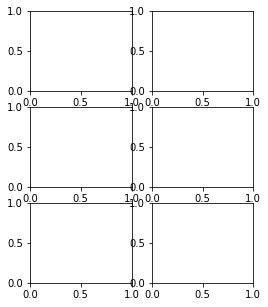

In [ ]:
# 3개의 행과 2개의 열의 공간을 확보. fig_size는 차트의 크기를 조절하는 값.
f, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(4, 5))

# ax의 크기는 3행 2열. 즉, 3 x 2의 크기를 가진다.
print('ax의 shape:', ax.shape)

# 총 6개의 값을 출력
print('ax 의 값을 출력 :', ax)

# 6개의 공간. 비유하자면 액자를 출력 (3행 2열)
print('그리고 할당한 공간을 출력')

3행 2열의 공간이 출력됩니다. 실질적으로 데이터를 넣지 않았으므로 차트는 출력되지만, 빈 공간만이 출력됩니다. 이번에는 실질적으로 데이터를 넣으면서 총 28개의 차트를 출력해봅시다. 28개의 차트를 14행, 2열의 구조로 출력해보겠습니다.

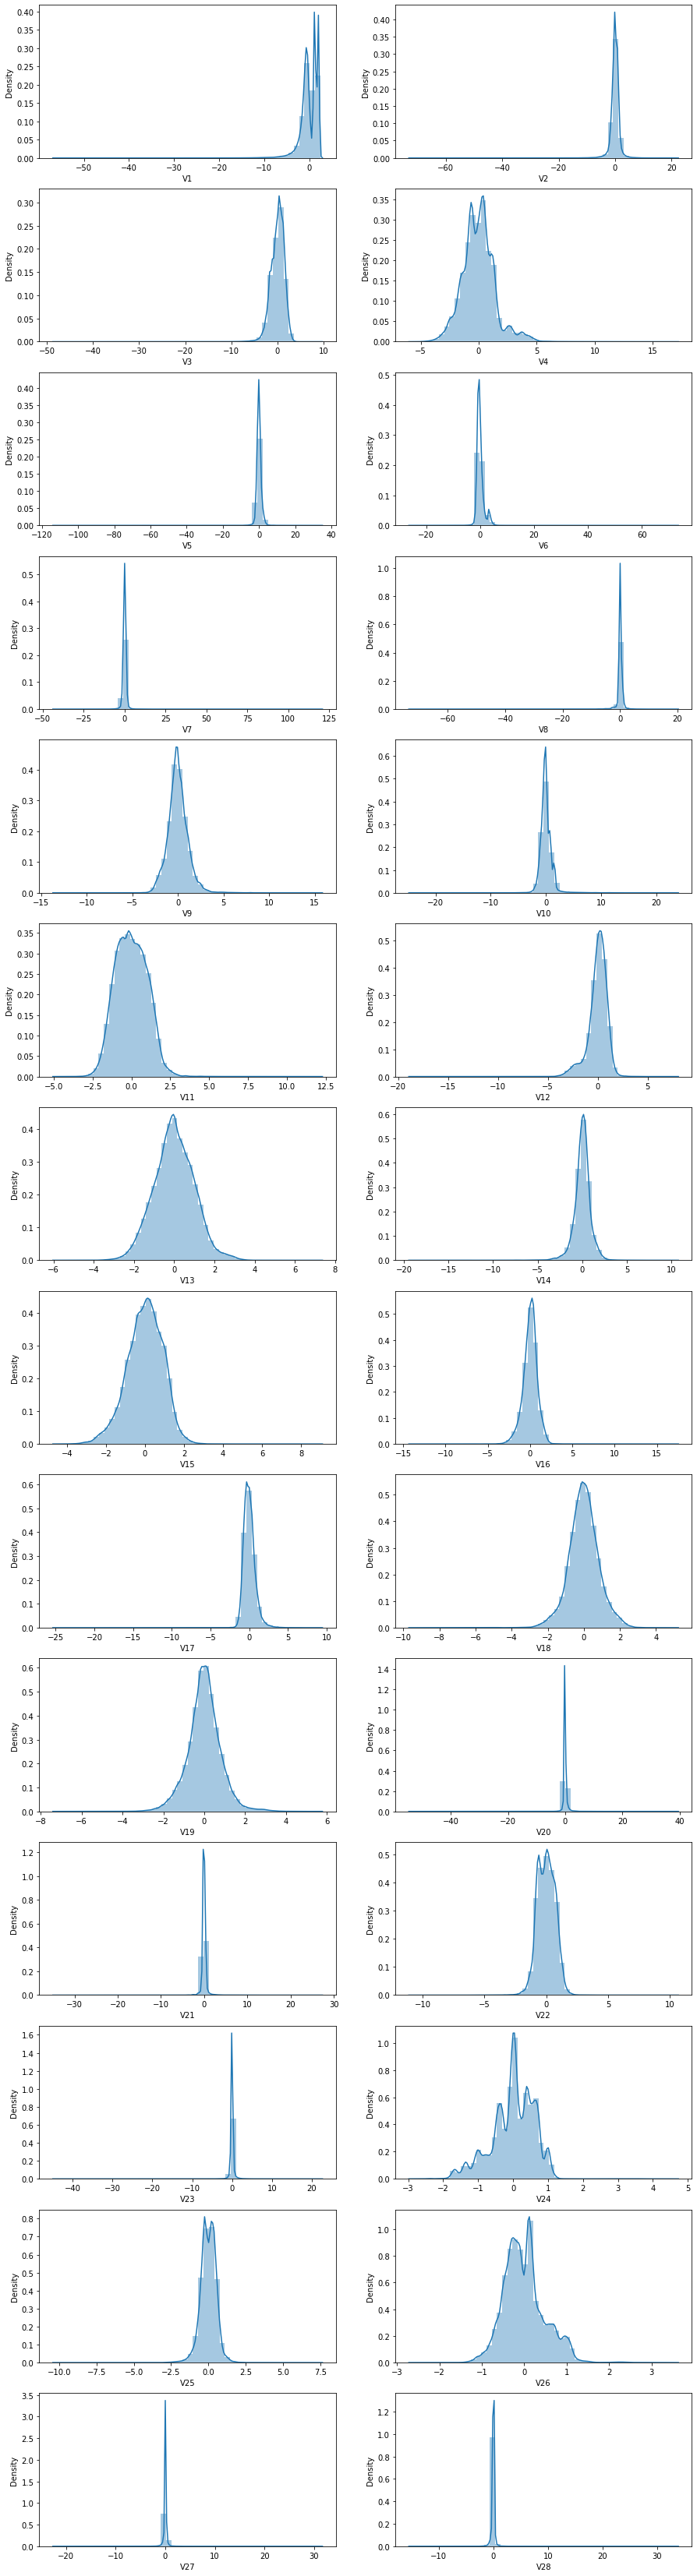

In [ ]:
# V로 시작되는 열만 추출. V라는 이름의 dataframe의 shape는 (284807, 28)
V = card_df[[col for col in card_df.columns if 'V' in col]]

# 14개의 행과 2개의 열의 공간을 확보. fig_size는 차트의 크기를 조절하는 값.
f, ax = plt.subplots(ncols = 2, nrows = 14, figsize=(15, 60))

# for문을 통해서 ax의 공간값과 V의 열의 이름을 하나씩 꺼내온다.
for i, column_name in zip(ax.flatten(), V.columns):

    # 하나씩 꺼내온 것을 순차적으로 시각화
    sns.distplot(V[column_name], ax = i)

각 데이터들에 대한 분포를 시각화했습니다. 이제 각 데이터의 분포가 적절한지를 판단해야 합니다. 특히, 모델의 예측에 강한 영향을 주는 특성(열)이라면 해당 데이터의 분포가 모델의 예측에 직접적인 영향을 줄 수 있습니다.

이제 로지스틱 회귀 모델을 통해서 학습해봅시다.

우선 전체 데이터에서 별 다른 의미가 없는 Time 열은 제거해줍니다.

In [ ]:
# 원본 데이터를 복사
card_df_copy = card_df.copy()

# 아무런 의미없는 Time 열을 제거
card_df_copy.drop('Time', axis=1, inplace=True)

# 열의 개수 1개 감소
print(card_df.shape) 

(284807, 31)


의 개수가 32개에서 31개로 줄었습니다. 이제 종속 변수에 해당하는 y열과 독립 변수들에 해당하는 X 데이터를 분리하는 작업을 해줍니다. 이는 Class 열을 분리하면 됩니다.

In [ ]:
# Class 열을 제외한 열만을 뽑아온다.
X_data = card_df_copy.iloc[:, :-1]

# Class 열만을 뽑아온다.
y_data = card_df_copy.iloc[:, -1]

# 열의 개수가 1개 감소
print(X_data.shape)

# 열의 개수가 1개
print(y_data.shape)

(284807, 29)
(284807,)


X 데이터는 29개의 열을 가지고, y 데이터는 1개의 열을 가집니다.

이제 훈련 데이터와 테스트 데이터를 7:3의 비율로 분리해봅시다.

현재 레이블이 굉장히 불균형하기 때문에 분리 후에도

훈련 데이터와 테스트 데이터의 레이블 비율이 유지되도록 해줍시다.

이는 인자로서 **stratify=y데이터**를 사용하여 가능합니다.

In [ ]:
from sklearn.model_selection import train_test_split

# X_data와 y_data를 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0, stratify=y_data)

X_train은 훈련 데이터의 독립 변수 데이터

y_train은 훈련 데이터의 레이블

X_test는 테스트 데이터의 독립 변수 데이터

y_test는 테스트 데이터의 레이블에 해당됩니다.

데이터 분리 시에 레이블 비율이 유지되도록 해주었으므로

훈련 데이터와 테스트 데이터의 레이블 비율이 동등하게 유지되는지 확인해봅시다.

In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 거래 비율 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'사기 탐지 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 거래 비율 = 99.827%
사기 탐지 = 0.173%


훈련 데이터에서 레이블이 1인 비중은 0.173%입니다.

In [ ]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 거래 비율 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'사기 탐지 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 거래 비율 = 99.827%
사기 탐지 = 0.173%


마찬가지로 테스트 데이터에서도 레이블이 1인 비중은 0.173%입니다.

현재 데이터가 레이블이 굉장히 불균형한 상태이기 때문에

f1-score를 도입하여 모델을 평가하도록 합니다.

사이킷런에서는 precision, recall, f1_score를 이미 함수로서 제공하고 있으므로

이를 사용하도록 하고, 여러번 평가를 진행할 것이므로 평가 자체를 위한 함수를 만듭니다.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
def metrics(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f}'.format(accuracy, precision, recall))
  print('f1-score : {0:.4f}'.format(f1))

이제 분류 문제를 위한 모델인 로지스틱 회귀를 수행합니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#모델 구성하기
model = Sequential()
model.add(Dense(32, input_dim=len(X_train.columns), activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1, activation='sigmoid'))

딥 러닝을 할 때, Dense열에서 출력층을 제외한 은닉층에서는 일반적으로 relu 함수를 activation 함수로 사용합니다.

optimizer에서 'sgd'는 경사 하강법이고, 'adam'은 sgd를 좀 더 업그레이드한 버전으로 'sgd'보다 성능이 더 좋다.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['acc'])

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, callbacks=[mc], batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
3108/3116 [============================>.] - ETA: 0s - loss: 0.0199 - acc: 0.9990
Epoch 1: val_acc improved from -inf to 0.99933, saving model to best_model.h5
3116/3116 [==============================] - 14s 3ms/step - loss: 0.0198 - acc: 0.9990 - val_loss: 0.0050 - val_acc: 0.9993
Epoch 2/10
3115/3116 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9992
Epoch 2: val_acc did not improve from 0.99933
3116/3116 [==============================] - 11s 4ms/step - loss: 0.0093 - acc: 0.9992 - val_loss: 0.0043 - val_acc: 0.9993
Epoch 3/10
3104/3116 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9992
Epoch 3: val_acc did not improve from 0.99933
3116/3116 [==============================] - 11s 3ms/step - loss: 0.0072 - acc: 0.9992 - val_loss: 0.0043 - val_acc: 0.9993
Epoch 4/10
3115/3116 [============================>.] - ETA: 0s - loss: 0.0044 - acc: 0.9994
Epoch 4: val_acc improved from 0.99933 to 0.99939, saving model to best_model.h5
3116/

In [ ]:
model = load_model('best_model.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
metrics(y_test, y_pred)

정확도 : 0.9994, 정밀도 : 0.9040, 재현률 : 0.7635
f1-score : 0.8278


다른 머신 러닝 모델들과도 비교해봅시다.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

테스트 데이터의 예측값 상위 5개를 출력해봅시다.

상위 5개는 전부 정상 데이터로 예측했습니다.

In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 0])

이제 테스트 데이터에 대해서 이미 만들어둔 metrics 함수를 통해 모델의 성능을 평가합니다.

In [ ]:
metrics(y_test, y_pred)

정확도 : 0.9992, 정밀도 : 0.8455, 재현률 : 0.6284
f1-score : 0.7209


---

아래서부터는 심화 과정입니다. 여기서부터는 교재를 참고해서 더 공부하실 분들은 공부하시면 됩니다. 개요를 살펴봅시다.

# Credit Card Fault Detection ML 구축
- 매우 불균형한 데이터. 99%가 정상, 1%정도만 비정상.

# 학습목표
- 다양한 feature engineering 방식을 변경해본다
    - 비대칭 데이터(skewed data)에 대한 분포변경(로그변환)
    - 이상치 제거 => 이상치 제거시 알고리즘 효과가 극적으로 좋아지는 경우가 많다.
        
### 로그변환이란?
: 왜곡된 분포를 가진 데이터셋을 비교적 정규분포에 가깝도록 바로 변환해주는 `매우 훌륭한 feature engineering 방식`이다.  
    - 데이터가 치우쳐져 있다? => 일단 로그변환을 적용해본다!   
    - 로그변환을 하면 왜곡된 분포도를 가진 데이터셋을 쉽게 정규분포의 형태로 변환할 수 있다.
    
### IQR을 이용한 이상치 제거
    - IQR을 가장 쉽고 효과적으로 시각화해주는 것이 바로 boxplot

---

데이터를 분석하는데 중요한 역할을 하는 열(Column), 머신 러닝 용어로는 특성(feature)은 제대로 된 예측을 위해 정규 분포를 유지하는 것이 중요합니다. Amount는 신용카드 사용 금액으로 정상/사기 트랜잭션을 예측하는데 매우 중요한 특성입니다. 분포를 확인해봅시다.

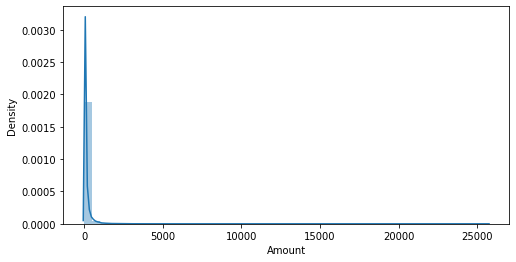

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(card_df['Amount'])

카드 사용금액이 1000불 이하인 데이터가 대부분이며, 27000불까지는 드물지만 데이터가 존재하면서 꼬리가 매우 긴 형태의 분포를 보입니다. 이렇게 데이터의 분포가 커지면 머신 러닝 모델 예측에 악영향을 줄 수 있습니다. 이렇게 분포가 고르지 않을 경우에는 대게 데이터 정규화라는 과정을 거칩니다. 정규화에는 몇 가지 방법이 존재하는데, 여기서는 이 중 사이킷런의 StandardScaler를 사용합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_card_df_copy = card_df.copy()
scaler = StandardScaler()
amount_n = scaler.fit_transform(standard_card_df_copy['Amount'].values.reshape(-1, 1))
# 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
standard_card_df_copy.insert(0, 'Amount_Scaled', amount_n)
# 기존 Time, Amount 피처 삭제
standard_card_df_copy.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
standard_card_df_copy.head()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


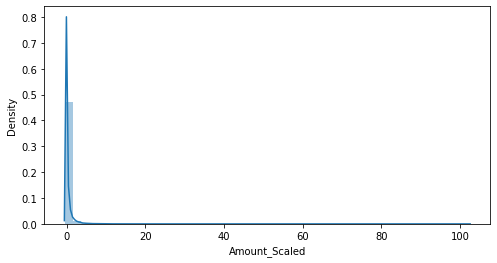

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(standard_card_df_copy['Amount_Scaled'])

데이터의 분포가 0~25000까지 크게 펼쳐져 있던 것에서 많이 개선되었습니다.

In [ ]:
# Class 열을 제외한 열만을 뽑아온다.
X_data = standard_card_df_copy.iloc[:, :-1]

# Class 열만을 뽑아온다.
y_data = standard_card_df_copy.iloc[:, -1]

# 열의 개수가 1개 감소
print(X_data.shape)

# 열의 개수가 1개
print(y_data.shape)

(284807, 29)
(284807,)


In [ ]:
# X_data와 y_data를 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0, stratify=y_data)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
metrics(y_test, y_pred)

정확도 : 0.9992, 정밀도 : 0.8654, 재현률 : 0.6081
f1-score : 0.7143


성능에 변화가 생겼습니다. 어떤 정규화 방법이 더 좋은 성능을 얻을지는 상황과 데이터에 따라서 다릅니다.

이번에는 데이터 분포도가 심각하게 왜곡되어 있을 경우 사용하는 방법인 로그 변환으로 진행해봅시다.

In [ ]:
log_card_df_copy = card_df.copy()
amount_n = np.log1p(log_card_df_copy['Amount'])
log_card_df_copy.insert(0, 'Amount_Scaled', amount_n) # 추가
log_card_df_copy.drop(['Time','Amount'], axis=1, inplace=True) # 제거

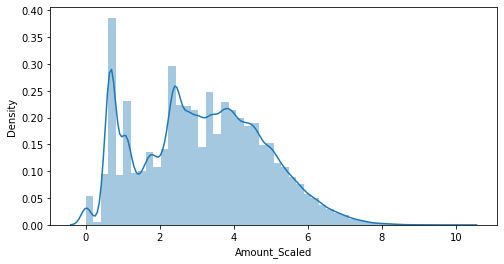

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(log_card_df_copy['Amount_Scaled'])

분포도가 확연하게 바뀐 것을 확인할 수 있습니다. 해당 데이터로 로지스틱 회귀를 진행해봅시다.

In [ ]:
# Class 열을 제외한 열만을 뽑아온다.
X_data = log_card_df_copy.iloc[:, :-1]

# Class 열만을 뽑아온다.
y_data = log_card_df_copy.iloc[:, -1]

# 열의 개수가 1개 감소
print(X_data.shape)

# 열의 개수가 1개
print(y_data.shape)

(284807, 29)
(284807,)


In [ ]:
# X_data와 y_data를 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0, stratify=y_data)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
metrics(y_test, y_pred)

정확도 : 0.9992, 정밀도 : 0.8812, 재현률 : 0.6014
f1-score : 0.7149


StandardScaler를 사용했을 때와는 다른 성능을 얻었습니다. 

이상치 데이터(Outlier, 아웃라이어)는 전체 데이터의 일반적인 패턴과는 다른 양상을 보이는 데이터입니다. 일반적이지 않은 패턴이기 때문에 머신 러닝 예측 성능에 영향을 줄 수 있는 요소가 됩니다. 여전히 많은 데이터 사이언티스들이 이상치 탐지를 위한 연구를 진행해오고 있습니다.  

이상치 탐지 방법 중에서는 IRQ(Inter Qunatile Range) 방법이  있습니다. IRQ는 데이터의 사분위 값(Quantile)의 편차를 이용합니다. 사분위란 무엇일까요?  

사분위는 전체 데이터들을 오름차순으로 정렬하고, 정확히 4등분(25%, 50%, 75%, 100%)으로 나눕니다. 여기서 75% 지점의 값과 25% 지점의 값의 차이를 IQR이라고 합니다. 이 IQR에 1.5를 곱해서 75% 지점의 값에 더하면 최댓값, 25% 지점의 값에서 빼면 최솟값으로 결정합니다. 이 때, 결정된 최댓값보다 크거나 최솟값보다 작은 값을 이상치 라고 간주합니다. 이 1.5라는 값은 사용자의 판단에 따라서 다른 값을 사용할 수도 있지만, 일반적으로는 1.5를 사용합니다.

이제 이상치를 제거할 특성을 골라야 합니다. 모든 특성에 대해서 이상치를 제거하는 것은 시간적으로도 비효율적이고, 결과적으로 효과적이지도 않습니다. 레이블과 상관도가 높은 특성을 위주로 이상치를 제거하는 것이 좋습니다. 이러한 특성을 고르기 위해서 상관 분석을 진행해봅시다.

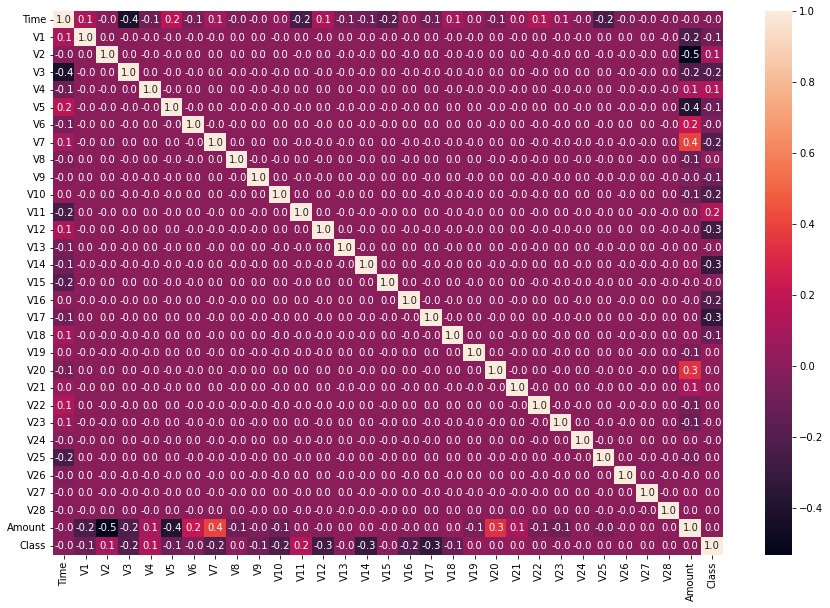

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(card_df.corr(), annot = True, fmt = '.1f')

Class와 가장 상관관계가 높은 특성은 무엇인가요? V12, V14, V17이 -0.3으로 가장 음의 상관도가 높습니다. 여기서는 V14를 임의로 고르고 V14에 대한 이상치를 제거하는 방향으로 진행해봅시다.

In [ ]:
import numpy as np

def remove_outlier(df, column):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    # IQR에 1.5를 곱한다.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * 1.5

    # 최댓갑과 최솟값 연산.
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    # 아웃라이어 필터링 후 아웃라이어에 해당되는 인덱스 리턴
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
outlier_index = remove_outlier(df=card_df, column='V14')
print('이상치 샘플의 인덱스:', outlier_index)

이상치 샘플의 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


총 4개의 데이터가 이상치 데이터로 뽑혔습니다. 이번에는 정규화 + 이상치 데이터 검출을 진행한 데이터로 평가해봅시다.

In [ ]:
outlier_index = remove_outlier(df=standard_card_df_copy, column='V14')
standard_card_df_copy.drop(outlier_index, axis=0, inplace=True)

In [ ]:
len(standard_card_df_copy)

284803

기존에는 284807의 샘플수였으나 현재 4개가 감소된 284803의 데이터를 가진다.

In [ ]:
# Class 열을 제외한 열만을 뽑아온다.
X_data = standard_card_df_copy.iloc[:, :-1]

# Class 열만을 뽑아온다.
y_data = standard_card_df_copy.iloc[:, -1]

# 열의 개수가 1개 감소
print(X_data.shape)

# 열의 개수가 1개
print(y_data.shape)

(284803, 29)
(284803,)


In [ ]:
# X_data와 y_data를 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0, stratify=y_data)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
metrics(y_test, y_pred)

정확도 : 0.9993, 정밀도 : 0.8596, 재현률 : 0.6712
f1-score : 0.7538


재현률과 f1 score가 상승하였습니다.

In [ ]:
#모델 구성하기
model = Sequential()
model.add(Dense(32,input_dim=len(X_train.columns) ,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['acc'])

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, callbacks=[mc], batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
3106/3116 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9975
Epoch 1: val_acc improved from -inf to 0.99945, saving model to best_model.h5
3116/3116 [==============================] - 17s 5ms/step - loss: 0.0175 - acc: 0.9975 - val_loss: 0.0036 - val_acc: 0.9994
Epoch 2/10
3108/3116 [============================>.] - ETA: 0s - loss: 0.0047 - acc: 0.9990
Epoch 2: val_acc did not improve from 0.99945
3116/3116 [==============================] - 18s 6ms/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.0033 - val_acc: 0.9994
Epoch 3/10
3116/3116 [==============================] - ETA: 0s - loss: 0.0042 - acc: 0.9993
Epoch 3: val_acc did not improve from 0.99945
3116/3116 [==============================] - 18s 6ms/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 4/10
3111/3116 [============================>.] - ETA: 0s - loss: 0.0038 - acc: 0.9993
Epoch 4: val_acc improved from 0.99945 to 0.99950, saving model to best_model.h5
3116/

In [ ]:
model = load_model('best_model.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
metrics(y_test, y_pred)

정확도 : 0.9995, 정밀도 : 0.8931, 재현률 : 0.8014
f1-score : 0.8448
